# **Linear Regression**

**Supervised machine learning algorithms:** It is a type of machine learning, where the algorithm learns from labeled data.  

* **Labeled data** means the dataset whose respective target value is already known.

* Supervised learning has two types:

  * **Classification:** It predicts the class of the dataset based on the independent input variable. Class is the categorical or discrete values. like the image of an animal is a cat or dog?

  * **Regression:** It predicts the continuous output variables based on the independent input variable. like the prediction of house prices based on different parameters like house age, distance from the main road, location, area, etc.

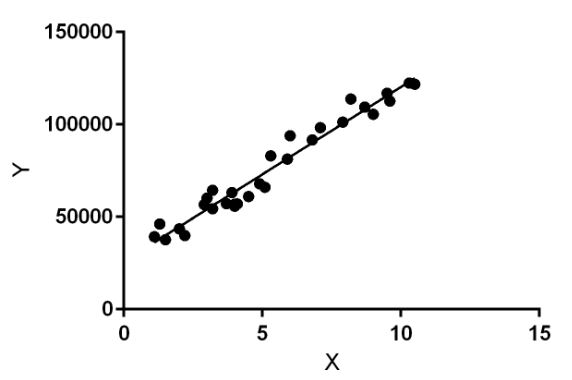

The above diagram is an example of Simple Linear Regression, where change in the value of feature 'Y' is proportional to value of 'X'.

* **Y :** Dependent or Target Variable.

* **X :** Independent Variable.

* **Regression Line:** It is best-fit line of the model, by which we can predict value of 'Y' for new values of 'X'.

**Assumption of Linear Regression:**

Linear regression makes several key assumptions about the data and the relationships it models. Violations of these assumptions can affect the validity and reliability of the regression results. Here are the main assumptions of linear regression:

* **Linearity:** The relationship between the independent variable(s) and the dependent variable is linear. This means that the change in the dependent variable for a unit change in the independent variable is constant.

* **Independence of Errors:** The errors (residuals) of the model are assumed to be independent of each other. In other words, the error of one observation should not be influenced by the errors of other observations.

* **Homoscedasticity:** Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the independent variables. This means that the spread of residuals should be roughly the same throughout the range of the predictor variables.

* **Normality of Errors:** The errors (residuals) should be normally distributed. This assumption is important for hypothesis testing and constructing confidence intervals.

* **No or Little Multicollinearity:** Multicollinearity occurs when two or more independent variables in the model are highly correlated. This can make it difficult to interpret the individual effects of each variable on the dependent variable.

* **No Endogeneity:** Endogeneity refers to the situation where an independent variable is correlated with the error term. This can arise due to omitted variable bias or simultaneous causation and can lead to biased and inconsistent coefficient estimates.

* **No Autocorrelation:** Autocorrelation occurs when the residuals of the model are correlated with each other. This assumption is important when dealing with time series data, where observations are dependent on previous observations.

* **Constant Variance of Residuals (Homoscedasticity):** Also known as homoscedasticity, this assumption states that the variance of the residuals is consistent across all levels of the independent variables. This is crucial for accurate hypothesis testing and confidence interval estimation.

* **No Perfect Collinearity:** Perfect collinearity exists when one independent variable can be perfectly predicted by a linear combination of other independent variables. This situation leads to a rank-deficient matrix, making it impossible to estimate unique regression coefficients.

# **Salary Prediction using Simple Linear Regression**

In [1]:
# Step1: Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step2: Import the Dataset
data = pd.read_csv('Salary_dataset.csv')
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [3]:
data.shape

(30, 3)

In [4]:
# Get information of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


 **Exploratory Data Analysis (EDA):**

In [5]:
# 1. NULL Value Treatment

data.isna().sum()
# So, no null values present

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
# 2. Drop duplicate values

data.duplicated()
# No duplicates present

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [7]:
# 3. Calculate summary statistics

data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
# 4. No categorical variables present

 **Split Dataset:**

In [9]:
# Extract dependent(denoted by Y - target variable) and
# independent(denoted by X) features from Dataset
X = data['YearsExperience']
Y = data['Salary']

 **Splitting Training and Testing Dataset:**

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Convert Series to DataFrame
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

 **Model Fitting:**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [13]:
# Predict output for the x_test dataset

y_pred = regressor.predict(x_test)
y_pred

array([[39297.22202233],
       [75603.43359409],
       [37386.36878171],
       [60316.60766914],
       [63182.88753007],
       [52673.19470666]])

 **Checking Accuracy Score:**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [15]:
# Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
mse

36064238.493955195

In [16]:
# R2 - Score

r2 = r2_score(y_test, y_pred)
r2

# r2_score = 0.81, which is closer to 1.
# So, the line of regression is accurate.

0.8143022783109011

In [17]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, y_pred)
mae

5392.453356511892

# Sales Prediction 

In [18]:
marketing = pd.read_csv('tvmarketing.csv')

In [19]:
marketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [20]:
marketing.shape

(200, 2)

In [21]:
marketing.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

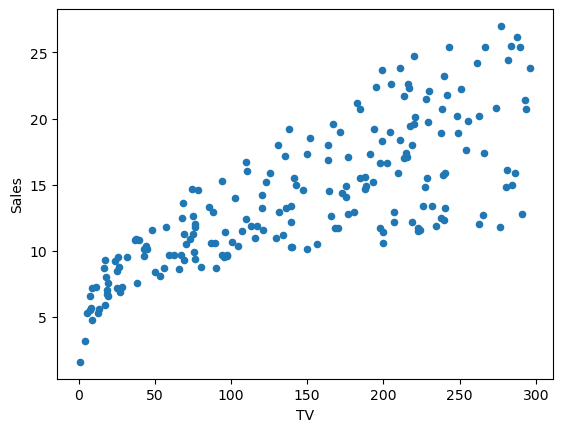

In [22]:
marketing.plot(x='TV',y='Sales',kind='scatter')

In [23]:
x = marketing["TV"].values.reshape(-1, 1)
y = marketing['Sales'].values.reshape(-1,1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [25]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(x_test)
print(regressor.intercept_)

print(regressor.coef_)

[7.29249377]
[[0.04600779]]


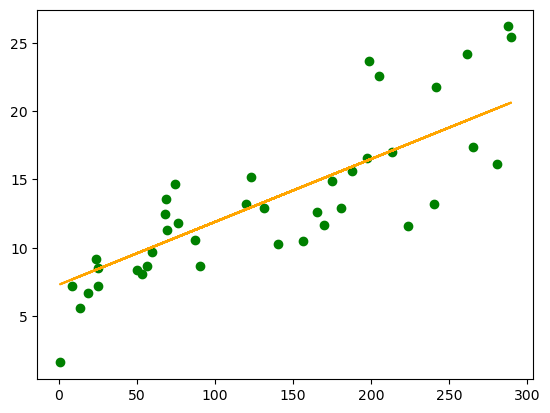

In [27]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test,y_pred, color="orange")
plt.show()

In [28]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  2.505418178966002
Mean Squared Error:  10.186181934530214
R2 Score:  0.6763151577939723
